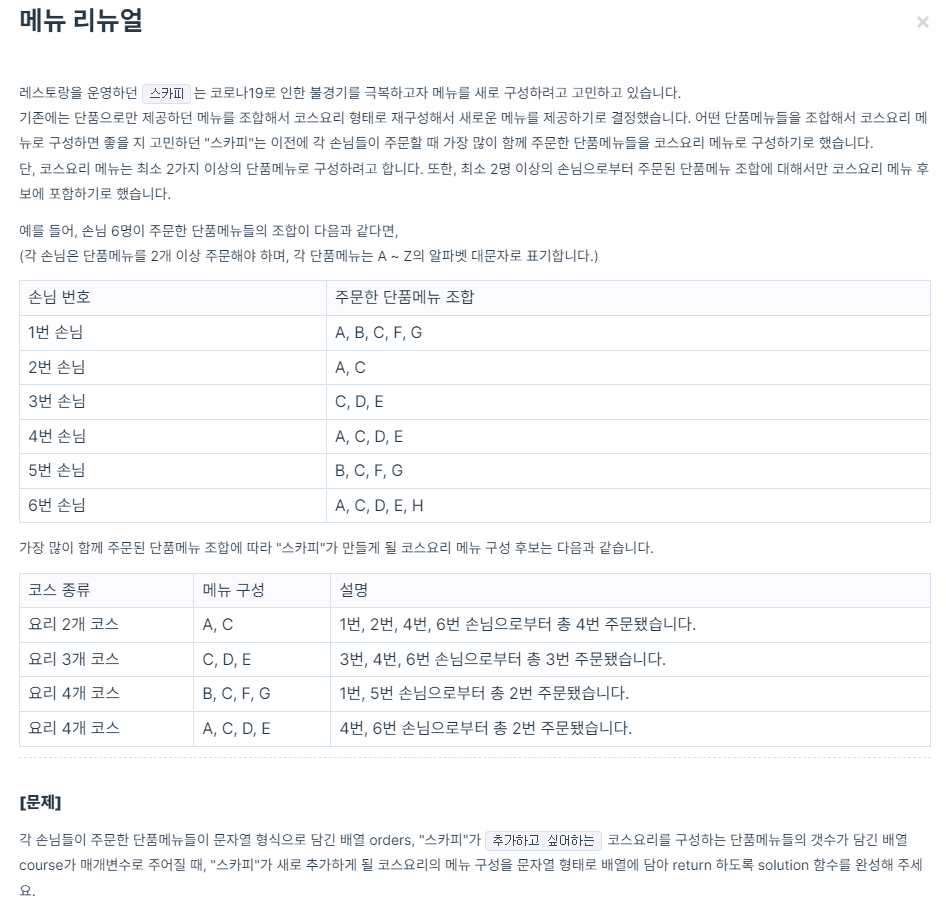

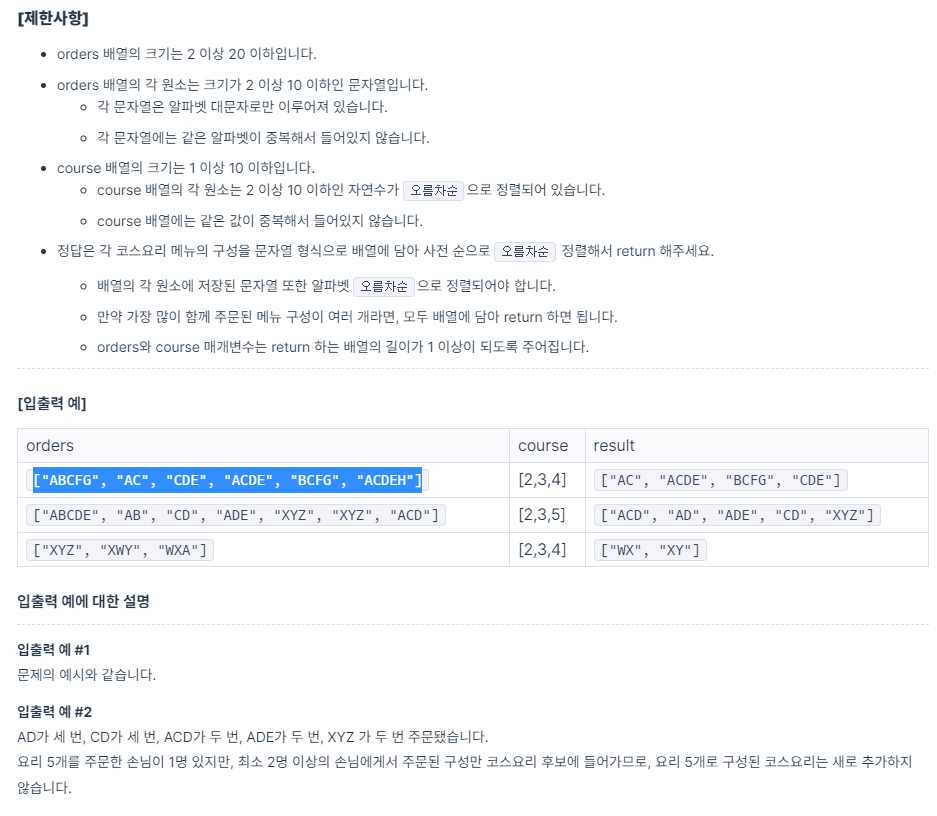

In [7]:
'''
카카오 2021 블라인드 채용 코테 : 메뉴 리뉴얼
해당 코드는 문제를 제대로 파악하지 못해 모든 경우의 수에 대해 2번이상 등장한 조합을 return..
문제를 다시 이해해보니 각 course에서 가장 많이 주문한 조합을 return, 주문 수가 동일할 때 모두 출력
'''
from itertools import combinations
def solution_incorrect(orders, course):
    menu = set()
    orders = list(map(lambda x: ''.join(sorted(list(x))), orders))
    for i in orders:
        for j in list(i):
            menu.add(j)
    menu = sorted(menu)
    comb = []
    for i in course:
        for c in combinations(menu,i):
            comb.append(''.join(c))
    comb_d = {i:0 for i in comb}
    for o in orders:
        for cb in comb:
            for c in cb:
                if c not in o:
                    break
                elif cb[-1] == c:
                    comb_d[cb] += 1
    answer = list(filter(lambda x: x[1]>1, comb_d.items()))
    return list(map(lambda x: x[0], sorted(answer, key=lambda x: x[0])))

In [2]:
'''
해당 코드는 정답이나 case 2개 시간초과
모든 메뉴에 대한 모든 조합을 구하고 그 조합이 포함된 모든 것을 찾기 때문에 굉장히 비효율적
이 부분을 수정 시도
'''
from itertools import combinations
def solution_timeover(orders, course):
    menu = set()
    orders = list(map(lambda x: ''.join(sorted(list(x))), orders))
    for i in orders:
        for j in list(i):
            menu.add(j)
    menu = sorted(menu)
    comb = []
    for i in course:
        for c in combinations(menu,i):
            comb.append(''.join(c))
    comb_d = {i:0 for i in comb}
    for o in orders:
        for cb in comb:
            for c in cb:
                if c not in o:
                    break
                elif cb[-1] == c:
                    comb_d[cb] += 1
    answer = []
    for i in course:
        temp = list(filter(lambda x: x[1]>1 and len(x[0]) == i, comb_d.items()))
        temp = sorted(temp, key=lambda x: x[1], reverse=True)
        if temp:
            max_t = temp[0][1]
            for j in range(len(temp)):
                if max_t == temp[j][1]:
                    answer.append(temp[j][0])
    return sorted(answer)
    
    

In [1]:
'''
조합의 수를 줄임! -> 존재하는 것들만으로
'''
from itertools import combinations
def solution(orders, course):
    orders = list(map(lambda x: ''.join(sorted(x)), orders))
    comb_d = {}
    for od in orders:
        for num in course:
            if len(od) >= num:
                for comb in combinations(od, num):
                    if comb_d.get(comb):
                        comb_d[comb] += 1
                    else:
                        comb_d[comb] = 1
            else:
                break
    answer = []
    for i in course:
        temp = list(filter(lambda x: x[1]>1 and len(x[0]) == i, comb_d.items()))
        temp = sorted(temp, key=lambda x: x[1], reverse=True)
        if temp:
            max_t = temp[0][1]
            for j in range(len(temp)):
                if max_t == temp[j][1]:
                    answer.append(temp[j][0])
    return list(map(lambda x:''.join(x), sorted(answer)))

In [8]:
orders = ["ABCFG", "AC", "CDE", "ACDE", "BCFG", "ACDEH"]
course = [2,3,4]

solution(orders, course), solution_timeover(orders, course), solution_incorrect(orders, course)

(['AC', 'ACDE', 'BCFG', 'CDE'],
 ['AC', 'ACDE', 'BCFG', 'CDE'],
 ['AC',
  'ACD',
  'ACDE',
  'ACE',
  'AD',
  'ADE',
  'AE',
  'BC',
  'BCF',
  'BCFG',
  'BCG',
  'BF',
  'BFG',
  'BG',
  'CD',
  'CDE',
  'CE',
  'CF',
  'CFG',
  'CG',
  'DE',
  'FG'])